In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras as ks
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

In [31]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [32]:
xtrain.shape

(60000, 28, 28)

In [33]:
xtrain, xtest = xtrain/255.0, xtest/255.0

In [34]:
xtrain.dtype

dtype('float64')

In [ ]:
ytrain = ks.utils.to_categorical(ytrain, 10) # Each digit (0–9) is represented by a vector with 10 elements:
ytest = ks.utils.to_categorical(ytest, 10)

In [ ]:
model = ks.models.Sequential(
    [
        Flatten(input_shape = (28,28)), #The Flatten layer reshapes the 2D input images (28x28 pixels) into a 1D vector with 784 elements (28*28=784).
        Dense(128, activation = 'relu'), #This is a fully connected layer with 128 neurons.
        Dense(64, activation = 'relu'),
        Dense(10, activation = 'softmax')
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer = SGD(learning_rate = 0.01), #learning_rate = 0.01 specifies the step size for updating the weights during each iteration
    loss = 'categorical_crossentropy' ,
    metrics = ['accuracy']
)

In [38]:
history = model.fit(xtrain, ytrain, epochs = 10, batch_size = 32, validation_data = (xtest, ytest))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7149 - loss: 1.0457 - val_accuracy: 0.9091 - val_loss: 0.3212
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9089 - loss: 0.3132 - val_accuracy: 0.9277 - val_loss: 0.2586
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9244 - loss: 0.2611 - val_accuracy: 0.9360 - val_loss: 0.2252
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9371 - loss: 0.2272 - val_accuracy: 0.9425 - val_loss: 0.1978
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9464 - loss: 0.1872 - val_accuracy: 0.9480 - val_loss: 0.1761
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9506 - loss: 0.1702 - val_accuracy: 0.9530 - val_loss: 0.1608
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9564 - loss: 0.1555 - val_accuracy: 0.9563 - val_loss: 0.1485
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9619 - loss: 0.1354 - 

In [39]:
test_loss, test_accuracy = model.evaluate(xtest, ytest, verbose = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9595 - loss: 0.1422


In [40]:
print(f'{test_loss:.4f}, {test_accuracy:.4f}')

0.1211, 0.9649


In [ ]:
ytest = np.argmax(ytest, axis = 1)
#np.argmax finds the index of the maximum value in each row (each one-hot encoded vector) along the specified axis.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


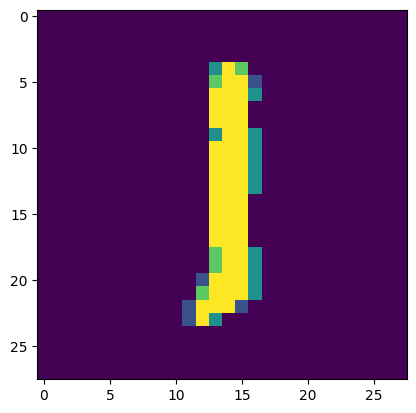

1


In [42]:
ypred = model.predict(xtest)
plt.imshow(xtest[14])
plt.show()
ypred = np.argmax(ypred, axis = 1)
print(ypred[14])

In [43]:
class_report = classification_report(ytest, ypred)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.97      0.95      0.96       982
           5       0.97      0.95      0.96       892
           6       0.96      0.97      0.96       958
           7       0.97      0.96      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



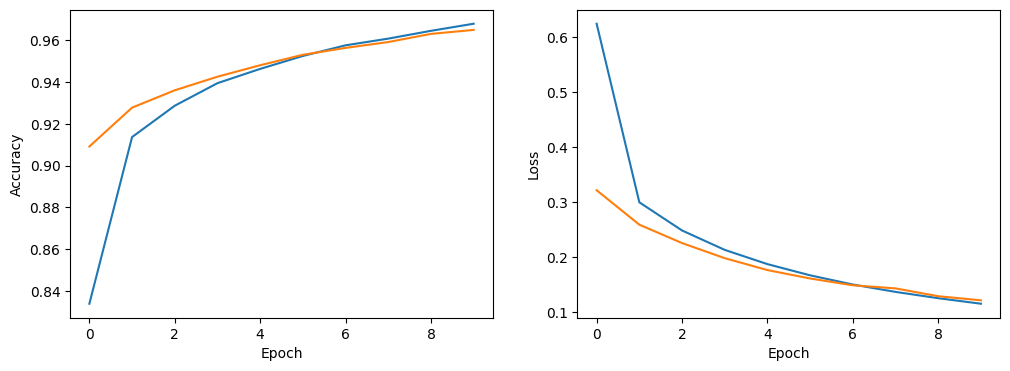

In [44]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()